# PTSNet - Basic introduction to simulating transient events

We will use TNET3, to demonstrate how to:

- Import PTSNet
- Define simulation settings 
- Generate a transient model
- Set up a transient event
- Run transient simulation
- Get simulation results

<img src="figures\f1_tnet3.png" alt="Drawing" style="width: 700px;"/>

## Import packages

In [1]:
# Import packages
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ptsnet.simulation.sim import PTSNETSimulation
from ptsnet.utils.io import get_example_path, export_time_series

---

## Simulation Settings
Simulation settings can be defined using a dictionary. We show below the default simulation settings. The user can use these settings in the simulations or modify only specific entries.

In [10]:
default_settings = {
    "time_step" : 0.01, # Simulation time step in [s]
    "duration" : 20, # Simulation duration in [s]
    "period" : 0, # Simulation period for EPS
    "default_wave_speed" : 1000, # Wave speed value for all pipes in [m/s]
    "wave_speed_file_path" : None, # Text file with wave speed values
    "delimiter" : ',', # Delimiter of text file with wave speed values
    "wave_speed_method" : 'optimal', # Wave speed adjustment method
    "save_results" : True, # Saves numerical results in HDF5 format
    "skip_compatibility_check" : False, # Dismisses compatibility check
    "show_progress" : False, # Shows progress (Warnings should be off)
    "profiler_on" : False, # Measures computational times of the simulation
    "warnings_on" : False # Warnings are displayed if True
}

---

## Example 1 - Valve closure
    
We will start by demonstrating how to simulate a transient event by closing VALVE-179.

The first step is to create a new PTSNET simulation. The function `PTSNETSimulation` creates a new PTSNET simulation that reads an input file (.inp) located in the specificed directory. The function requires: 
- `warkspace_name` - name of the folder to save all the results and other auxiliary information; 
- `inpfile` - name of the .inp file of the hydraulic model. Users can specify the location of the file or load one of the examples provided with PTSNET by using the `get_example_path` function.
- `settings` - the user can also provide new settings, if settings are not defined, default settings are loaded automatically.

In [33]:
# Create a simulation 
inpfile = 'networks/TNET3.inp'                   # user can specify the location of the .inp file
print(f"Path to the input file: {inpfile}")
sim = PTSNETSimulation(
    workspace_name = 'TNet3_valve',         # specify workspace name where outputs will be stored
    inpfile = inpfile,
    settings = default_settings                # if settings are not defined, default settings are loaded automatically
)

Path to the input file: networks/TNET3.inp


In [34]:
# print basic information about the simulation
print(sim)

PTSNETSimulation <duration = 20 [s] | time_steps = 2617 | num_points = 5,098>


### Define valve closure event and run simulation
Users can manipulate specific valves of the system via the `define_valve_operation` function. The function requires the following inputs: 
- `name`  - the name of the valve; User can also manipulate multiple valves simultaneously by providing a list of valves names.
- `initial setting` - initial setting of the valve; 
- `final setting` - final setting of the valve; 
- `start_time (s)` - start time; 
- `end_time (s)` - end time of the event. 

Valve settings are defined as fractional opening from zero (closed) to one (fully open). By default the closure occurs linearly varying the setting of the valve. 

Users can define custom operational rules using time series specifying setting values Y for specific times X. 

In [35]:
# set up transient event
sim.define_valve_operation('VALVE-179', initial_setting = 1, final_setting = 0, start_time = 1, end_time = 2)

# run simulation
sim.run()

### Plot results
- Plot head (m) at select nodes

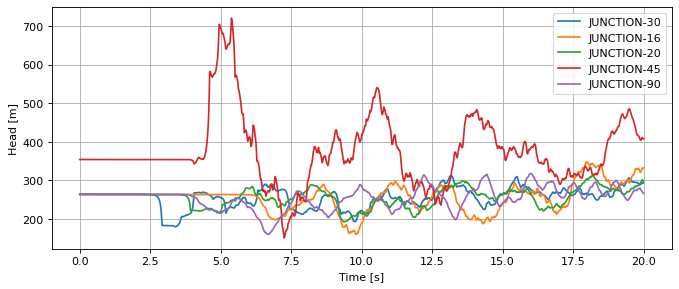

In [36]:
# plot heads
fig = plt.figure(figsize=(10,4), dpi=80, facecolor='w', edgecolor='k')
plt.plot(sim['time'], sim['node'].head['JUNCTION-30'], label='JUNCTION-30')
plt.plot(sim['time'], sim['node'].head['JUNCTION-16'], label='JUNCTION-16')
plt.plot(sim['time'], sim['node'].head['JUNCTION-20'], label='JUNCTION-20')
plt.plot(sim['time'], sim['node'].head['JUNCTION-45'], label='JUNCTION-45')
plt.plot(sim['time'], sim['node'].head['JUNCTION-90'], label='JUNCTION-90')
plt.xlabel('Time [s]'); plt.ylabel('Head [m]')
plt.legend()
plt.grid(True)
plt.show()


---

## Example 2 - Pump shut-off

We will simulate pump shut-off event by closing PUMP-172.

Use function `PTSNETSimulation` to create a new PTSNET simulation.

Users can shut-off pumps using the `define_pump_operation`. The function requires the following inputs: 
- `name` - the name of the pump; 
- `initial setting` - initial setting of the pump; 
- `final setting` - final setting of the pump; 
- `start_time (s)` - start time; 
- `end_time (s)` - end time of the event. 

Pump settings are defined as fractional opening from zero (closed) to one (fully open). By default the closure occurs linearly varying the setting of the pump. Users can define custom operational rules using time series specifying settnig values Y for specific times X. 

### Get example network
Users can also load example networks that are included with PTSNET by using the `get_example_path` function. Note, here `default_settings` are used when creating the simulation.

In [37]:
# create a simulation
inptfile = get_example_path('TNET3')
sim = PTSNETSimulation(workspace_name = 'TNet3_pump', inpfile = inpfile)

In [38]:
# define a transient event
sim.define_pump_operation('PUMP-172', initial_setting = 1, final_setting = 0, start_time = 0, end_time = 1)

# run simulation
sim.run()

### Plot results
- Plot head (m) at select nodes

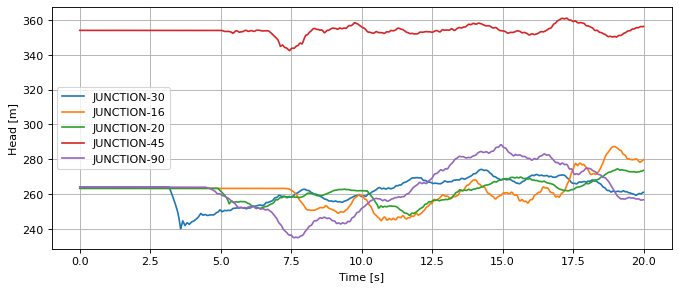

In [39]:
# plot head
fig = plt.figure(figsize=(10,4), dpi=80, facecolor='w', edgecolor='k')
plt.plot(sim['time'], sim['node'].head['JUNCTION-30'], label='JUNCTION-30')
plt.plot(sim['time'], sim['node'].head['JUNCTION-16'], label='JUNCTION-16')
plt.plot(sim['time'], sim['node'].head['JUNCTION-20'], label='JUNCTION-20')
plt.plot(sim['time'], sim['node'].head['JUNCTION-45'], label='JUNCTION-45')
plt.plot(sim['time'], sim['node'].head['JUNCTION-90'], label='JUNCTION-90')
plt.xlabel('Time [s]'); plt.ylabel('Head [m]')
plt.legend()
plt.grid(True)
plt.show()

- Plot flow rate ($m^3/s$) in LINK-35 (start and end)

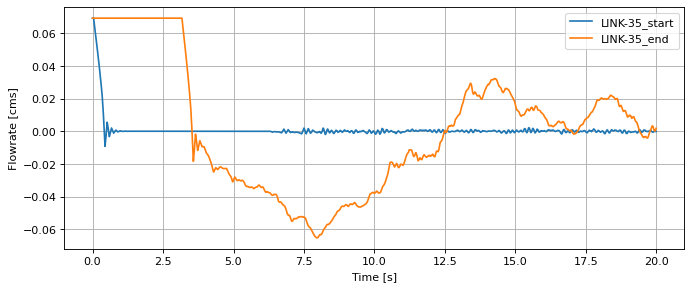

In [40]:
# plot flowrate
fig = plt.figure(figsize=(10,4), dpi=80, facecolor='w', edgecolor='k')
plt.plot(sim['time'], sim['pipe.start'].flowrate['LINK-35'], label='LINK-35_start')
plt.plot(sim['time'], sim['pipe.end'].flowrate['LINK-35'], label='LINK-35_end')
plt.xlabel('Time [s]'); plt.ylabel('Flowrate [cms]')
plt.legend()
plt.grid(True)
plt.show()

---

##  Example 3 - Burst

We will simulate burst event at JUNCTION-73.

Use function `PTSNETSimulation` to create a new PTSNET simulation.

Use function `add_bust`to generate a burst. The function requires the following inputs: 
- `name` - the name of the location (node) of the burst; 
- `burst_coeff` - final burst coefficient; 
- `start_time (s)` - start time; 
- `end_time (s)` - end time of the event. 

Note, we are changing the duration of the simulation to 30 (s), and the rest of the default settings remain unchanged.

In [41]:
# create a simulation
sim = PTSNETSimulation(workspace_name = 'TNet3_burst', inpfile = inpfile, settings={'duration':30})

# define transient event
sim.add_burst('JUNCTION-73', burst_coeff = 0.02, start_time = 1, end_time = 2)

# run the simulation
sim.run()

### Plot results
- Plot head (m) at select nodes

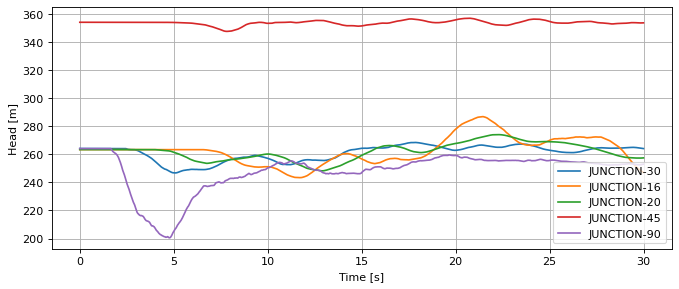

In [42]:
# plot head
fig = plt.figure(figsize=(10,4), dpi=80, facecolor='w', edgecolor='k')
plt.plot(sim['time'], sim['node'].head['JUNCTION-30'], label='JUNCTION-30')
plt.plot(sim['time'], sim['node'].head['JUNCTION-16'], label='JUNCTION-16')
plt.plot(sim['time'], sim['node'].head['JUNCTION-20'], label='JUNCTION-20')
plt.plot(sim['time'], sim['node'].head['JUNCTION-45'], label='JUNCTION-45')
plt.plot(sim['time'], sim['node'].head['JUNCTION-90'], label='JUNCTION-90')
plt.xlabel('Time [s]'); plt.ylabel('Head [m]')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

- Plot burst discharge ($m^3/s$). Note, initially there is no discharge before the burst occurs and the burst develops in time. 

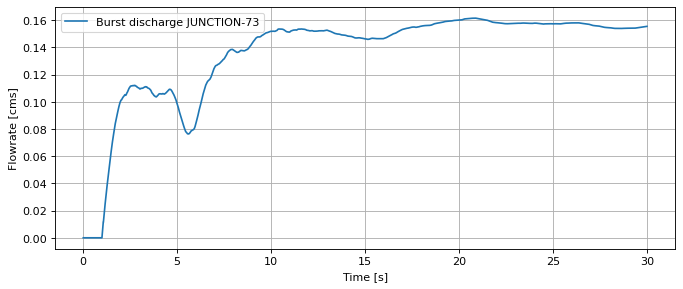

In [43]:
# plot discharge
fig = plt.figure(figsize=(10,4), dpi=80, facecolor='w', edgecolor='k')
plt.plot(sim['time'], sim['node'].leak_flow['JUNCTION-73'], label='Burst discharge JUNCTION-73')
plt.xlabel('Time [s]'); plt.ylabel('Flowrate [cms]')
plt.legend()
plt.grid(True)
plt.show()

- Plot demand discharge ($m^3/s$). Note, the demand fluctuation because the demand is modeled using pressure driven conditions.

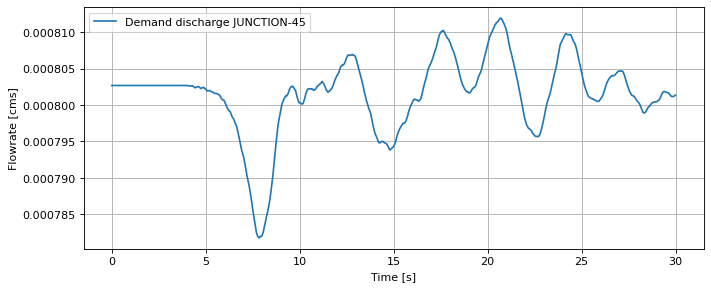

In [44]:
# plot discharge
fig = plt.figure(figsize=(10,4), dpi=80, facecolor='w', edgecolor='k')
plt.plot(sim['time'], sim['node'].demand_flow['JUNCTION-45'], label='Demand discharge JUNCTION-45')
plt.xlabel('Time [s]'); plt.ylabel('Flowrate [cms]')
plt.legend()
plt.grid(True)
plt.show()

---

##  Example 4 - Variable demands

Users can also generate transient events using variable demands. 

Use function `PTSNETSimulation` to create a new PTSNET simulation.

Use function `define_demand_settings`to induce variable demand at the nodes. The function requires the following inputs: 

- `name` - the name of the junction;
- `X` - the time (s) of the variable demand;
- `Y` - multiplier (from the base demand) of the demand;



In [45]:
# create new simulation
sim = PTSNETSimulation(workspace_name = 'TNet3_demand', inpfile = inpfile)

# define transient event
sim.define_demand_settings('JUNCTION-68', X = np.linspace(0,20,100), Y = np.random.rand(100)*0.01)

# run simulation
sim.run()

### Plot results
- Plot head (m) at select nodes

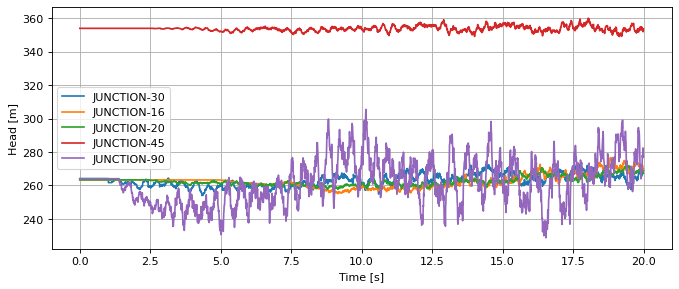

In [46]:
# plot head 
fig = plt.figure(figsize=(10,4), dpi=80, facecolor='w', edgecolor='k')
plt.plot(sim['time'], sim['node'].head['JUNCTION-30'], label='JUNCTION-30')
plt.plot(sim['time'], sim['node'].head['JUNCTION-16'], label='JUNCTION-16')
plt.plot(sim['time'], sim['node'].head['JUNCTION-20'], label='JUNCTION-20')
plt.plot(sim['time'], sim['node'].head['JUNCTION-45'], label='JUNCTION-45')
plt.plot(sim['time'], sim['node'].head['JUNCTION-90'], label='JUNCTION-90')
plt.xlabel('Time [s]'); plt.ylabel('Head [m]')
plt.legend()
plt.grid(True)
plt.show()

- Plot demand discharge ($m^3/s$)

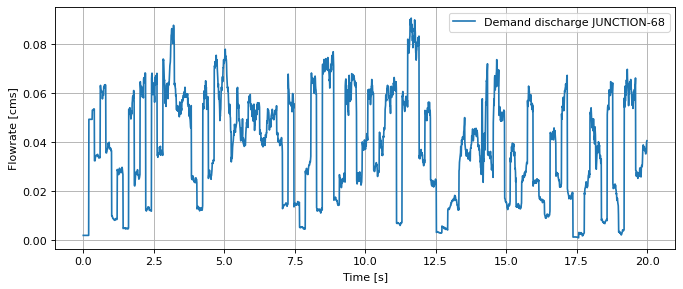

In [47]:
# plot discharge
fig = plt.figure(figsize=(10,4), dpi=80, facecolor='w', edgecolor='k')
plt.plot(sim['time'], sim['node'].demand_flow['JUNCTION-68'], label='Demand discharge JUNCTION-68')
plt.xlabel('Time [s]'); plt.ylabel('Flowrate [cms]')
plt.legend()
plt.grid(True)
plt.show()

---

## Example 5 - Open surge tank

Users can test the impact of installing open surge tanks in the network. We will place an open surge tank in JUNCTION-34 and generate a transient event again by closing PUMP-172. 

Use function `PTSNETSimulation` to create a new PTSNET simulation.

Use function `add_surge_protection` to add a tank to the network. For open surge tanks the function requires:
- `name` - the location (node) of the tank;
- `type` - speficy open surge tank;
- `tank_area` - the cross section area of the tank ($m^2$)

In [48]:
# create simulation
sim = PTSNETSimulation(workspace_name = 'TNet3_open_surge', inpfile = 'networks/TNET3.inp')

# define transient event
sim.define_pump_operation('PUMP-172', initial_setting = 1, final_setting = 0, start_time = 0, end_time = 1)

# add surge tank
sim.add_surge_protection('JUNCTION-34', 'open', tank_area = 0.1)

# run simulation
sim.run()

### Plot results

- Plot head (m) at select nodes

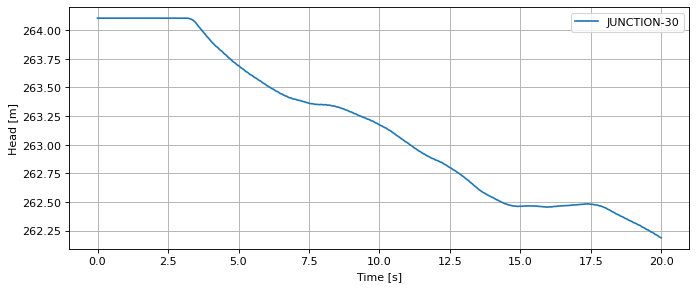

In [49]:
# plot head
fig = plt.figure(figsize=(10,4), dpi=80, facecolor='w', edgecolor='k')
plt.plot(sim['time'], sim['node'].head['JUNCTION-30'], label='JUNCTION-30')
plt.xlabel('Time [s]'); plt.ylabel('Head [m]')
plt.legend()
plt.grid(True)
plt.show()

## Example 6 - Closed surge tank

Users can also add a closed surge tank by using the `add_surge_protection`. For closed surge tanks the function requires:
- `name` - the location (node) of the tank;
- `type` - speficy open surge tank;
- `tank_area` - the cross section area of the tank ($m^2$);
- `tank_height` - the height of the tank (m);
- `water_level` - initial water level (m);

In [50]:
# create simulation
sim = PTSNETSimulation(workspace_name = 'TNet3_closed_surge', inpfile = 'networks/TNET3.inp')

# define transient event
sim.define_pump_operation('PUMP-172', initial_setting = 1, final_setting = 0, start_time = 0, end_time = 1)

# add surge tank
sim.add_surge_protection('JUNCTION-34', 'closed', tank_area = 0.1, tank_height = 1, water_level = 0.2)

# run simulation
sim.run()

### Plot results
- Plot head (m)

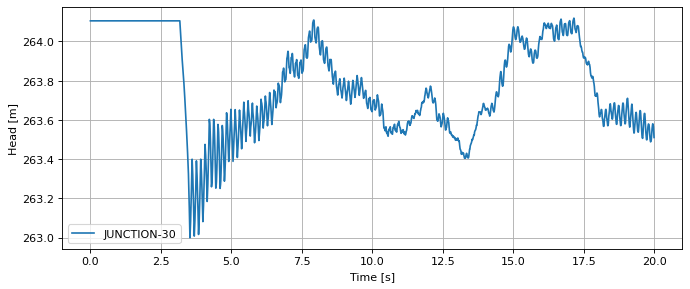

In [51]:
# plot head
fig = plt.figure(figsize=(10,4), dpi=80, facecolor='w', edgecolor='k')
plt.plot(sim['time'], sim['node'].head['JUNCTION-30'], label='JUNCTION-30')
plt.xlabel('Time [s]'); plt.ylabel('Head [m]')
plt.legend()
plt.grid(True)
plt.show()

### No surge tank

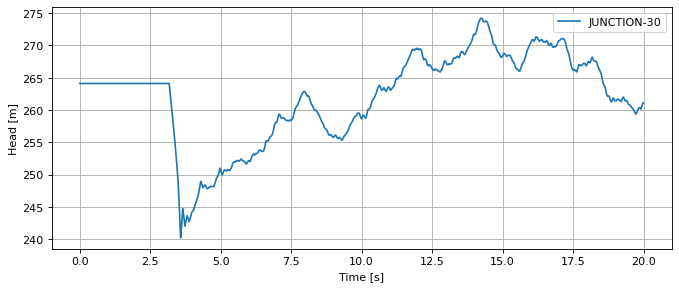

In [52]:
# create simulation
sim = PTSNETSimulation(workspace_name = 'TNet3_no_surge', inpfile = 'networks/TNET3.inp')

# define transient event
sim.define_pump_operation('PUMP-172', initial_setting = 1, final_setting = 0, start_time = 0, end_time = 1)

# run simulation
sim.run()

# plot head
fig = plt.figure(figsize=(10,4), dpi=80, facecolor='w', edgecolor='k')
plt.plot(sim['time'], sim['node'].head['JUNCTION-30'], label='JUNCTION-30')
plt.xlabel('Time [s]'); plt.ylabel('Head [m]')
plt.legend()
plt.grid(True)
plt.show()